In [ ]:
# Problem: lateral water transport into lake is not being modelled
# Enhance by meltwater by a quarter
# if lake:
#        if cell["Lfrac"][0] + cell["Sfrac"][0] > 1:
#            excess_water = cell["Lfrac"][0] + cell["Sfrac"][0] - 1
#            cell["lake_depth"] += 1.25*excess_water * (
#                cell["firn_depth"] / cell["vert_grid"]
#            )
# To do: find out why this code is active even if there is a lid present

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import pandas as pd
import matplotlib.dates as mdates

expt_id = 'era5_2013_2024_19'
start_time = pd.Timestamp('2013-01-01 00:00')

default_filepath = dirPath + '1d_testcase_output_era5_2013_2024_19.nc' 
dump_filepath   = dirPath + '1d_testcase_dump_' + expt_id  + '.nc' 
melt_mul_filepath = dirPath + '1d_testcase_output_era5_2013_2024_20.nc' 

default = nc.Dataset(default_filepath, 'r')
melt_mul = nc.Dataset(melt_mul_filepath, 'r')
dump = nc.Dataset(dump_filepath, 'r')

vertical_depth = dump.variables['vertical_profile'][0:,0, :]
vertical_depth = vertical_depth.squeeze() 

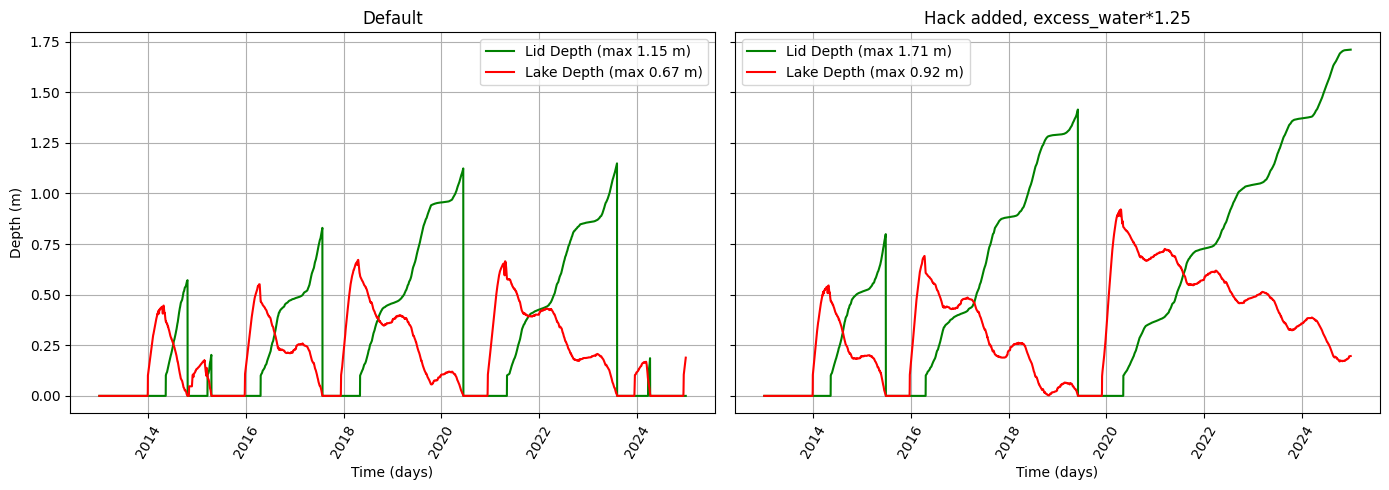

In [22]:
time_day = pd.date_range(start=start_time, periods=len(default.variables['lake_depth'][:, 0, 0]), freq='d')

lid_depth1 = default.variables['lid_depth'][:, 0, 0]
lake_depth1 = default.variables['lake_depth'][:, 0, 0]

lid_depth2 = melt_mul.variables['lid_depth'][:, 0, 0]
lake_depth2 = melt_mul.variables['lake_depth'][:, 0, 0]

fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

axs[0].plot(time_day, lid_depth1, label=f'Lid Depth (max {lid_depth1.max():.2f} m)', color='green')
axs[0].plot(time_day, lake_depth1, label=f'Lake Depth (max {lake_depth1.max():.2f} m)', color='red')
axs[0].set_title('Default')
axs[0].set_xlabel('Time (days)')
axs[0].set_ylabel('Depth (m)')
axs[0].legend()
axs[0].grid(True)
axs[0].tick_params(axis='x', rotation=60)

axs[1].plot(time_day, lid_depth2, label=f'Lid Depth (max {lid_depth2.max():.2f} m)', color='green')
axs[1].plot(time_day, lake_depth2, label=f'Lake Depth (max {lake_depth2.max():.2f} m)', color='red')
axs[1].set_title('Hack added, excess_water*1.25')
axs[1].set_xlabel('Time (days)')
axs[1].legend()
axs[1].grid(True)
axs[1].tick_params(axis='x', rotation=60)

plt.tight_layout()
plt.show()


In [23]:
default.close()
melt_mul.close()
dump.close()
